# Exploratory Data Analysis (EDA)

I cleaned my dataset and now I ready to EDA. I try to found some correlation between features and answers for questions:
1. Should we pay more for older or for modern houses?
2. What features are most important in predicting the price of a house: condition or grade?
3. How the size of a home affect its sale price?

In [36]:
# import all libraries for work 
import os # for work with path/dir
import pandas as pd

# visualizations
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns 
from scipy.stats import norm

# useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
import math

from math import radians, cos, sin, asin, sqrt

In [3]:
# quartile function. We divide the data into four quantiles and check the dependencies
def quantile(df, column_name):
# find quartile, max and min values
    min_value = df[column_name].min()
    first_quantile = df[column_name].describe()[4]
    second_quantile = df[column_name].describe()[5]
    third_quantile = df[column_name].describe()[6]
    max_value = df[column_name].max()
# Bin edges that will be used to "cut" the data into groups
    bin_edges = [ min_value, first_quantile, second_quantile, third_quantile, max_value]
# Labels for the four budget level groups
    bin_names = [ 'First', 'Second', 'Third', 'Fourth'] 
# Creates budget_levels column
    name = '{}_levels'.format(column_name)
    df[name] = pd.cut(df[column_name], bin_edges, labels=bin_names, include_lowest = True)
    return df

# quartile count function. We divide the data into four quantiles and check the dependencies
def quantile_count(df, column_name):
    count = pd.DataFrame(columns=[column_name,'count'])
    count.loc[0]=(str(df[column_name].min())+'-'+str(df[column_name].describe()[4]),df[df[column_name+'_levels']=='First']['price'].count())
    count.loc[1]=(str(str(df[column_name].describe()[4])+'-'+str(df[column_name].describe()[5])),df[df[column_name+'_levels']=='Second']['price'].count())
    count.loc[2]=(str(df[column_name].describe()[5])+'-'+str(df[column_name].describe()[6]),df[df[column_name+'_levels']=='Third']['price'].count())
    count.loc[3]=(str(df[column_name].describe()[6])+'-'+str(df[column_name].max()),df[df[column_name+'_levels']=='Fourth']['price'].count())
    return count

In [4]:
# read information from csv file
pd.set_option('display.max_columns', 999)
df = pd.read_csv("clean_kc_house_data.csv") 
df.shape

(16733, 22)

In [5]:
df.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,1


In [17]:
df.corr()['price'].sort_values(ascending=False)

price            1.000000
grade            0.597482
sqft_living      0.583422
sqft_living15    0.499996
sqft_above       0.473460
lat              0.435475
bathrooms        0.411137
view             0.287917
bedrooms         0.268800
floors           0.263698
sqft_basement    0.248299
yr_renovated     0.122484
waterfront       0.082607
condition        0.071873
year             0.008922
long             0.002552
zipcode          0.000505
day             -0.009371
month           -0.013997
sqft_lot        -0.021749
sqft_lot15      -0.023312
yr_built        -0.023417
Name: price, dtype: float64

The following correlation matrix shows the correlation between any two features of the data set.

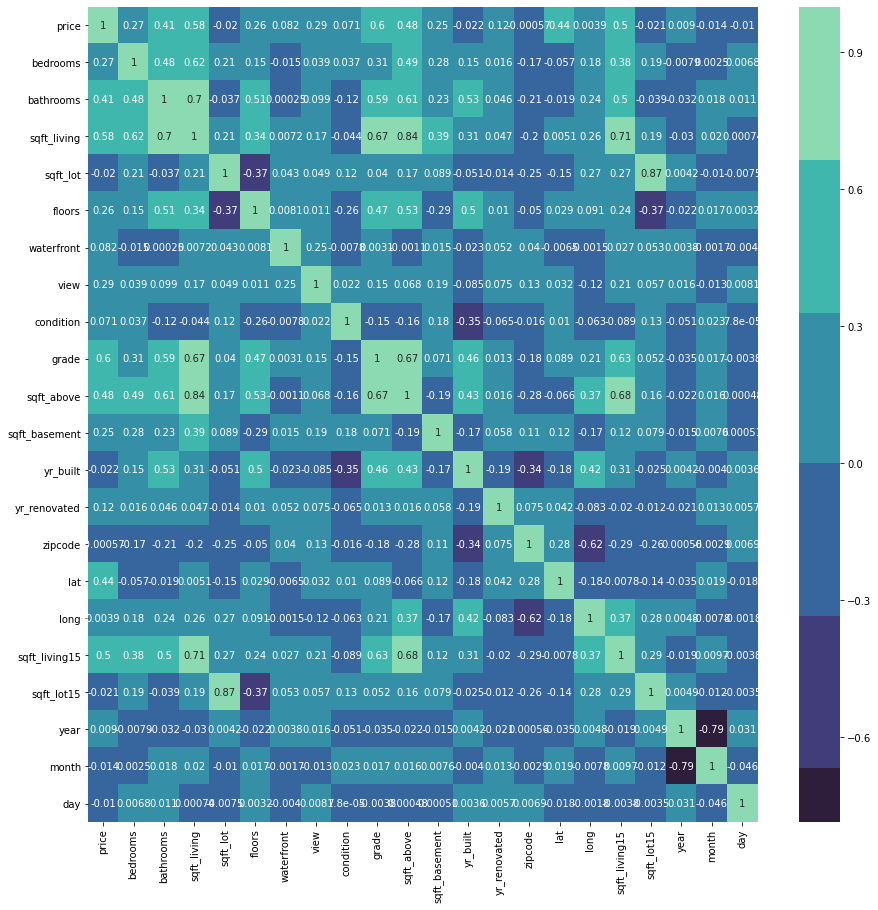

In [6]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, cmap=sns.color_palette('mako'), center=0);

## Looking for Multicollinearity

In [7]:
round(df.corr(), 3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
price,1.000,0.270,0.412,0.585,-0.020,0.264,0.082,0.287,0.071,0.599,0.475,0.248,-0.022,0.122,-0.001,0.435,0.004,0.501,-0.021,0.009,-0.014,-0.010
bedrooms,0.270,1.000,0.485,0.617,0.206,0.145,-0.015,0.039,0.037,0.313,0.489,0.283,0.149,0.016,-0.171,-0.057,0.180,0.381,0.191,-0.008,0.002,0.007
bathrooms,0.412,0.485,1.000,0.700,-0.037,0.510,0.000,0.099,-0.117,0.594,0.610,0.226,0.527,0.046,-0.208,-0.019,0.243,0.497,-0.039,-0.032,0.018,0.011
sqft_living,0.585,0.617,0.700,1.000,0.207,0.336,0.007,0.168,-0.044,0.670,0.835,0.386,0.310,0.047,-0.199,0.005,0.256,0.709,0.194,-0.030,0.020,0.001
sqft_lot,-0.020,0.206,-0.037,0.207,1.000,-0.370,0.043,0.049,0.124,0.040,0.167,0.089,-0.051,-0.014,-0.251,-0.148,0.274,0.267,0.873,0.004,-0.010,-0.008
floors,0.264,0.145,0.510,0.336,-0.370,1.000,0.008,0.011,-0.263,0.469,0.528,-0.287,0.497,0.010,-0.050,0.029,0.091,0.238,-0.371,-0.022,0.017,0.003
waterfront,0.082,-0.015,0.000,0.007,0.043,0.008,1.000,0.249,-0.008,0.003,-0.001,0.015,-0.023,0.052,0.040,-0.007,-0.001,0.027,0.053,0.004,-0.002,-0.004
view,0.287,0.039,0.099,0.168,0.049,0.011,0.249,1.000,0.022,0.152,0.068,0.186,-0.085,0.075,0.130,0.032,-0.121,0.206,0.057,0.016,-0.013,0.008
condition,0.071,0.037,-0.117,-0.044,0.124,-0.263,-0.008,0.022,1.000,-0.153,-0.155,0.182,-0.348,-0.065,-0.016,0.010,-0.063,-0.089,0.131,-0.051,0.023,0.000
grade,0.599,0.313,0.594,0.670,0.040,0.469,0.003,0.152,-0.153,1.000,0.672,0.071,0.464,0.013,-0.184,0.089,0.212,0.625,0.052,-0.035,0.017,-0.004


If we see coefficient more than *0.75* that mean two variables being 'highly correlated'.

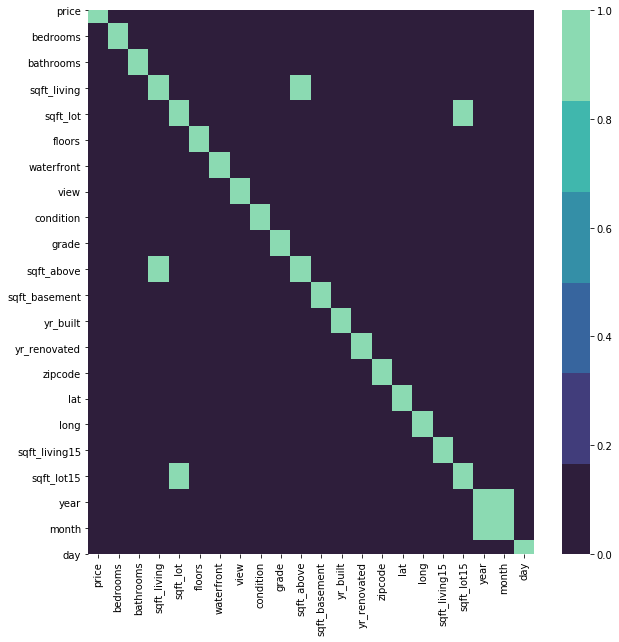

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(abs(df.corr()) > 0.75, cmap=sns.color_palette('mako'))

I decided to drop columns `month` and `sqft_lot15`.

In [21]:
df.drop('month', axis=1, inplace=True)
df.drop('sqft_lot15', axis=1, inplace=True)

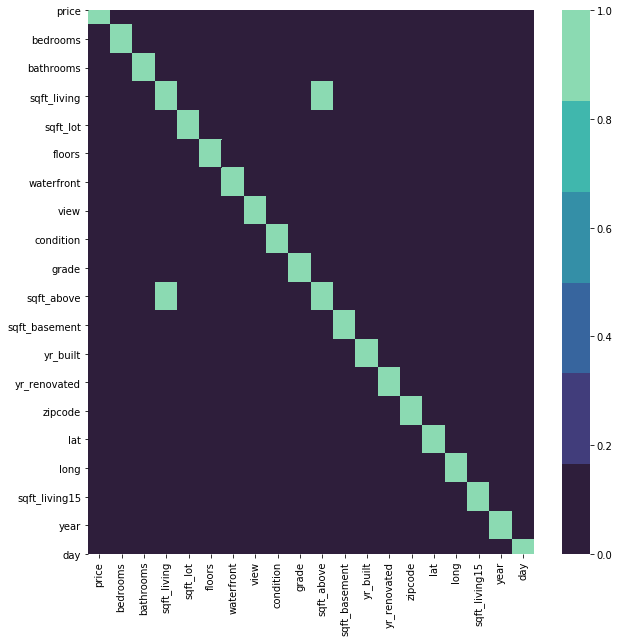

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(abs(df.corr()) > 0.75, cmap=sns.color_palette('mako'))

So, now I have only two highly correlated `'sqft_above'` and `'sqft_living'`. But `'sqft_above'` shows squre footage of house apart from basement. When `'sqft_living'` shows squre footage of all house, that can be more useful for predictions.

In [23]:
df.drop('sqft_above', axis=1, inplace=True)

In [27]:
# build a subset of numerical variables
subsets = ['price', 'bedrooms', 'sqft_lot', 'floors', 'view', 'sqft_basement', 
           'yr_built', 'sqft_living15']

# make the statistics easier to read and understand
data_descriptives = round(df[subsets].describe(), 3)
data_descriptives

,price,bedrooms,sqft_lot,floors,view,sqft_basement,yr_built,sqft_living15
count,16720.000,16720.000,16720.000,16720.000,16720.000,16720.000,16720.000,16720.000
mean,475449.502,3.282,7048.351,1.464,0.155,263.761,1968.251,1829.126
std,224388.122,0.858,3402.911,0.548,0.603,377.298,30.022,537.957
min,78000.000,1.000,520.000,1.000,0.000,0.000,1900.000,620.000
25%,310000.000,3.000,4729.000,1.000,0.000,0.000,1948.000,1436.750
50%,428000.000,3.000,7004.500,1.000,0.000,0.000,1968.000,1730.000
75%,590000.000,4.000,9000.000,2.000,0.000,530.000,1994.000,2150.000
max,1440000.000,6.000,19025.000,3.500,4.000,1400.000,2015.000,3650.000


# Questions 

## 1. Do we pay more for older or for modern houses?

In [279]:
#Basic stats for the yr_built feature.
df['yr_built'].describe()

count    16733.000000
mean      1968.267376
std         30.020164
min       1900.000000
25%       1948.000000
50%       1968.000000
75%       1994.000000
max       2015.000000
Name: yr_built, dtype: float64

Information in column `yr_build` range from 1900 to 2015 with a median of 1968. I thought that newer homes should be more expensive. But heatmap show me that isn't true. Negative number in heatmap means  - there are no correlationthe between two variables. But may be year of renovation show me better result.

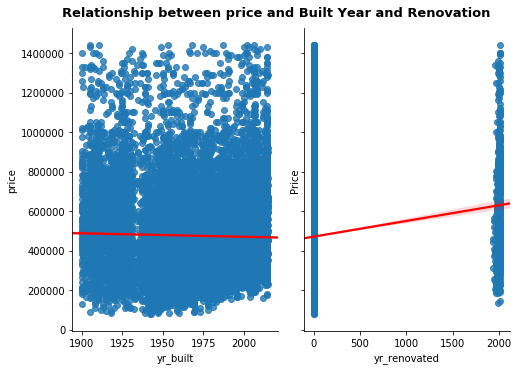

In [10]:
sns.pairplot(df, x_vars=['yr_built','yr_renovated'], y_vars='price', kind='reg', plot_kws={'line_kws':{'color':'red'}}, height=5, aspect=0.7)
plt.suptitle('Relationship between price and Built Year and Renovation', size=13, weight='bold', y=1.02)
plt.ylabel('Price');
plt.show()

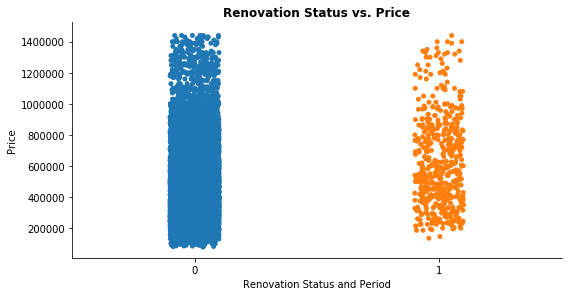

In [281]:
#make new feature - renovated: 1 == home has been renovated, 0 == we don't have any construction work
df['renovated'] = (df['yr_renovated']>0).astype(int)
# do we hava any differents?
sns.catplot(x="renovated", y="price", data=df, height=4, aspect=2)
plt.title('Renovation Status vs. Price', fontweight='bold')
plt.xlabel('Renovation Status and Period')
plt.ylabel('Price');

In [143]:
# median for each just to see what it is.
print('Median prices for', df.groupby('renovated')['price'].median())

Median prices for renovated
0    425000.0
1    577250.0
Name: price, dtype: float64


In [282]:
#Correlations with price
correlations = df.corr()
correlations['price']['renovated']

0.12152868899247996

In [145]:
from statsmodels.formula.api import ols
#OLS Regression
f = 'price~renovated'
model = ols(formula=f, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     250.8
Date:                Thu, 05 Mar 2020   Prob (F-statistic):           4.42e-56
Time:                        01:16:52   Log-Likelihood:            -2.2981e+05
No. Observations:               16733   AIC:                         4.596e+05
Df Residuals:                   16731   BIC:                         4.596e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.708e+05   1752.103    268.728      0.000    4.67e+05    4.74e+05
renovated   1.574e+05   9939.049     15.837      0.000    1.38e+05    1.77e+05
==============================================================================
Omnibus:                     3200.212   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6060.392
Skew:                           1.182   Prob(JB):                         0.00
Kurtosis:                       4.761   Cond. No.                         5.77
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [146]:
model.params

Intercept    470838.404120
renovated    157403.942034
dtype: float64

In [31]:
df['yr_built_cat'] = df['yr_built'].apply(lambda x: ('1900-1938' if x <= 1938 else '1939-1976') if x <= 1977 else '1977-2015')
df['yr_built_cat'] = pd.Categorical(df['yr_built_cat'], categories = ['1900-1938', '1939-1976', '1977-2015'])

df.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,year,day,yr_built_cat,yr_reno_cat
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,0,1955,0,98178,47.5112,-122.257,1340,2014,0,1939-1976,1900-1938
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,400,1951,1991,98125,47.7210,-122.319,1690,2014,1,1939-1976,1977-2015


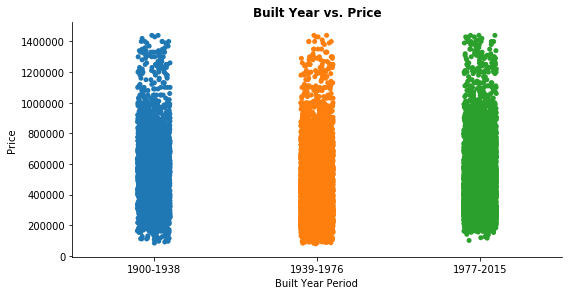

In [32]:
sns.catplot(x="yr_built_cat", y="price", data=df, height=4, aspect=2)

plt.title('Built Year vs. Price', fontweight='bold')
plt.xlabel('Built Year Period')
plt.ylabel('Price');

### Summary for question 1:
The **p-value** is zero that's good. This means that the feature is statistically significant. The coefficient of **157,404** would indicate that a renovated home has a price **157,404** more than a home that wasn't renovated.

## 2. What features are most important in predicting the price of a house: condition or grade?

In [33]:
df['grade'].value_counts()

7     7800
8     4817
6     1763
9     1691
10     421
5      179
11      33
4       16
Name: grade, dtype: int64

In [34]:
df['condition'].value_counts()

3    10701
4     4498
5     1377
2      123
1       21
Name: condition, dtype: int64

In [38]:
correlations = df.corr()
print('Correlation betwee price and grade ==', correlations['price']['grade'])
print('Correlation betwee price and condition ==', correlations['price']['condition'])

Correlation betwee price and grade == 0.5974822816048985
Correlation betwee price and condition == 0.07187267181119604


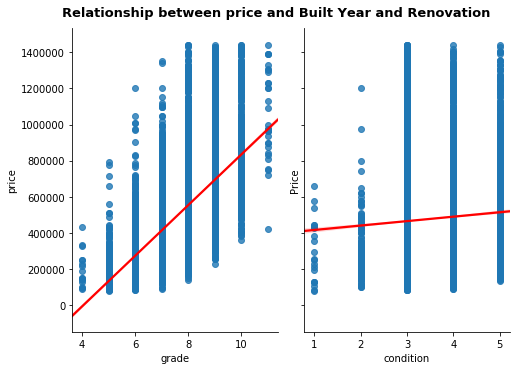

In [39]:
sns.pairplot(df, x_vars=['grade','condition'], y_vars='price', kind='reg', plot_kws={'line_kws':{'color':'red'}}, height=5, aspect=0.7)
plt.suptitle('Relationship between price and Built Year and Renovation', size=13, weight='bold', y=1.02)
plt.ylabel('Price');
plt.show()

This coefficient show us strong correlation between grade and price. What we can say about condition - it's still has.

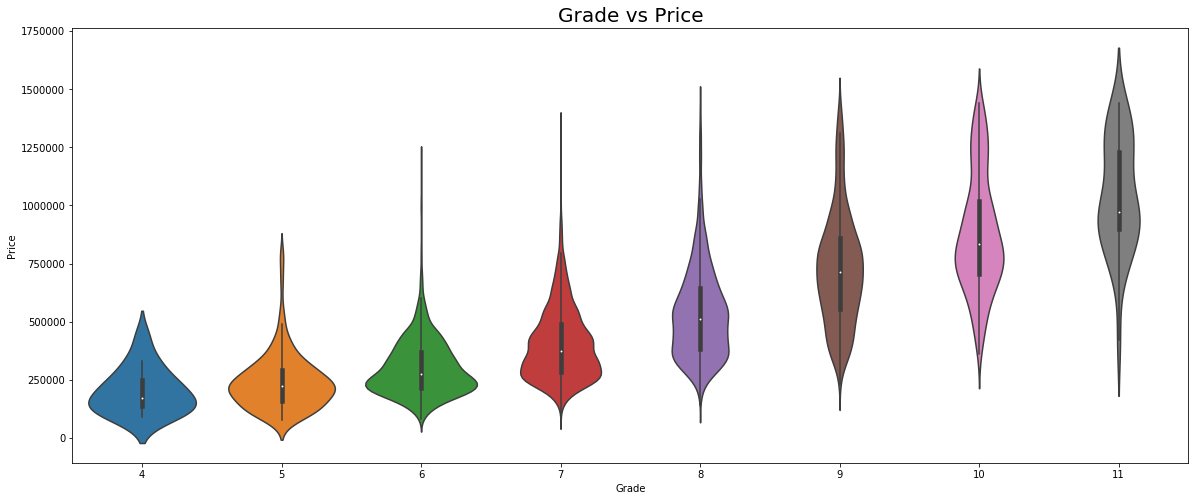

In [40]:
plt.figure(figsize=(20,8))
sns.violinplot(x='grade', y='price', data=df)
plt.title("Grade vs Price", fontsize=20)
plt.xlabel("Grade")
plt.ylabel("Price")
plt.show()

Text(0, 0.5, 'Mean Sale Price')

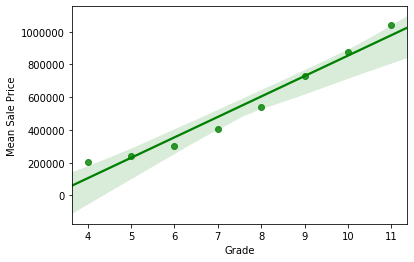

In [43]:
x_range = list(range(4,12))
mean_by_grade = df.groupby('grade').mean()['price']
mean_by_con = df.groupby('condition').mean()['price']
sns.regplot(x = x_range, y = mean_by_grade, color = 'green')
plt.xlabel('Grade')
plt.ylabel('Mean Sale Price')

Text(0, 0.5, 'Mean Sale Price')

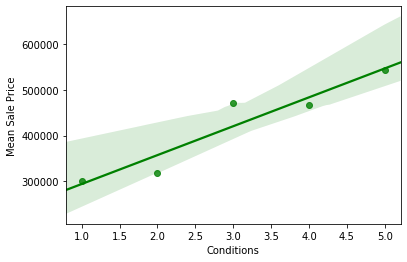

In [44]:
x_range1 = list(range(1,6))
sns.regplot(x = x_range1, y = mean_by_con, color = 'green')
plt.xlabel('Conditions')
plt.ylabel('Mean Sale Price')

**How we can see each grade his own affect on the price.**

In [45]:
grades_subset = pd.get_dummies(df.grade, prefix='grade').iloc[:,1:]
grades_subset.head(5)

,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11
0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0


In [47]:
# concatenate the subset of variable columns onto the original dataframe
data = pd.concat([df, grades_subset], axis=1)
data.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,year,day,yr_built_cat,yr_reno_cat,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,0,1955,0,98178,47.5112,-122.257,1340,2014,0,1939-1976,1900-1938,0,0,1,0,0,0,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,400,1951,1991,98125,47.7210,-122.319,1690,2014,1,1939-1976,1977-2015,0,0,1,0,0,0,0
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,0,1933,0,98028,47.7379,-122.233,2720,2015,2,1900-1938,1900-1938,0,1,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,910,1965,0,98136,47.5208,-122.393,1360,2014,1,1939-1976,1900-1938,0,0,1,0,0,0,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,0,1987,0,98074,47.6168,-122.045,1800,2015,2,1977-2015,1900-1938,0,0,0,1,0,0,0


In [48]:
X = data[['grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11']]
y = data.price

# fit the model
model = LinearRegression()
model.fit(X, y)


# print intercept
print("Estimated intercept:", model.intercept_)
# print R-square
print("Estimated R²:", model.score(X,y))
#
model.get_params()
#print("Estimated :", model.  )


Estimated intercept: 201378.12500000728
Estimated R²: 0.3681553006870797


{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [50]:
# pair the feature names with the coefficients into a dataframe
pd.DataFrame(list(zip(['grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10','grade_11' ], model.coef_)), columns=['Features', 'Estimated Coefficient'])

,Features,Estimated Coefficient
0,grade_5,39729.154330
1,grade_6,101036.851177
2,grade_7,201936.170513
3,grade_8,335836.333584
4,grade_9,527802.221541
5,grade_10,674819.221793
6,grade_11,842294.875000


In [51]:
data.corr()['price'].sort_values(ascending=False)

price            1.000000
grade            0.597482
sqft_living      0.583422
sqft_living15    0.499996
lat              0.435475
bathrooms        0.411137
grade_9          0.379309
view             0.287917
grade_10         0.287042
bedrooms         0.268800
floors           0.263698
sqft_basement    0.248299
grade_8          0.175112
yr_renovated     0.122484
grade_11         0.112616
waterfront       0.082607
condition        0.071873
year             0.008922
long             0.002552
zipcode          0.000505
day             -0.009371
sqft_lot        -0.021749
yr_built        -0.023417
grade_5         -0.108645
grade_6         -0.264758
grade_7         -0.300625
Name: price, dtype: float64

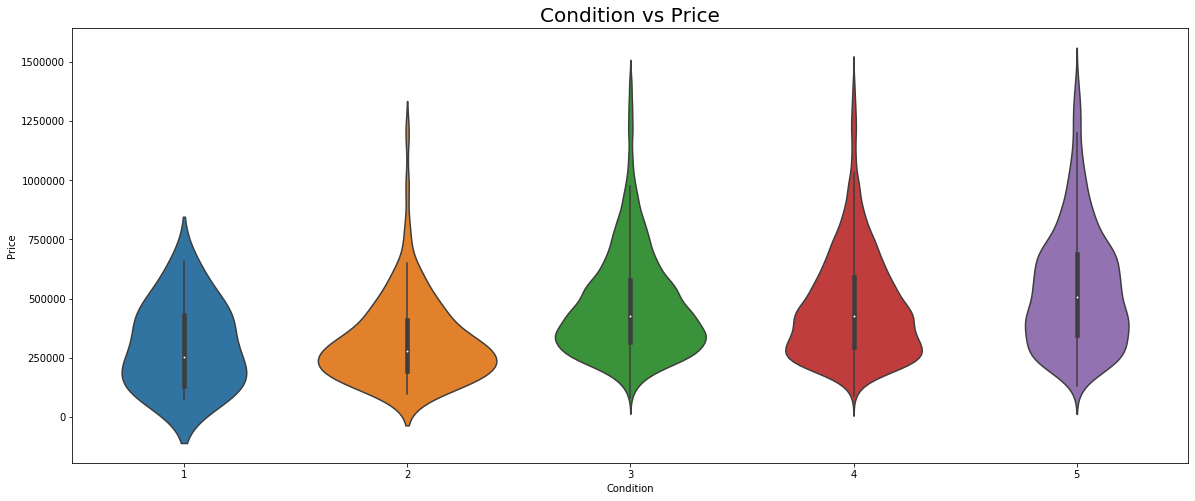

In [52]:
plt.figure(figsize=(20,8))
sns.violinplot(x='condition', y='price', data=df)
plt.title('Condition vs Price', fontsize=20)
plt.xlabel("Condition")
plt.ylabel("Price")
plt.show()

## Summary for question 2:

I found a strong correlation between grade and home price:  the higher the grade your home receives the more prices your home will sell for. 
It's makes sense because grade represents the construction quality of improvements. If  home has higher quality then we are going to sell itfor a higher value.
**This feature should go into the final model.**
But I didn't find the same correlation for conditions. I expected a more pronounced dependence, maybe we need to do any more manipulation with data.

## 3. How the size of a home affect its sale price?

How we can see in coorelation matrix - sqft_living has **0.584675**

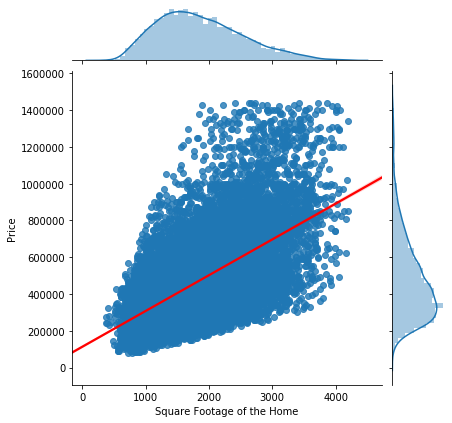

In [53]:
g = sns.jointplot(x="sqft_living", y="price", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}})# Only regression cyan
#plt.title('Prices vs. Square Feet', fontsize=20)
plt.xlabel('Square Footage of the Home')
plt.ylabel('Price')
plt.show()

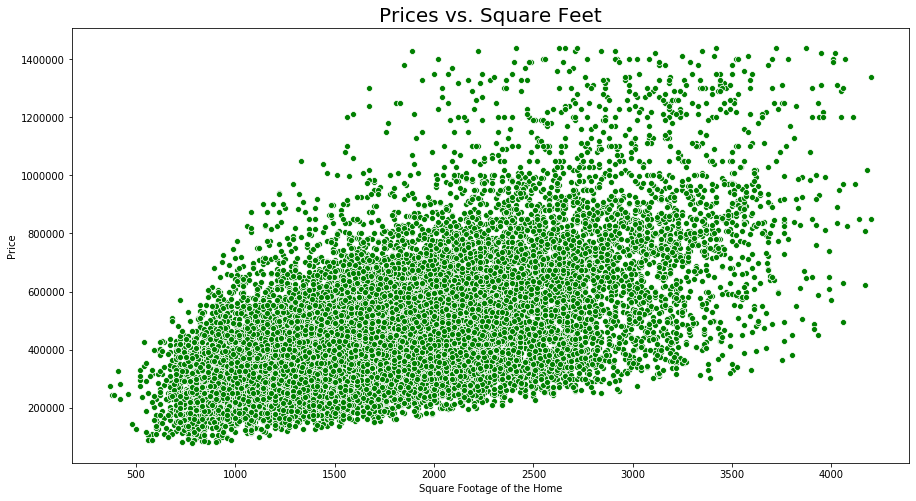

In [54]:
# Visualizing home prices
plt.figure(figsize = (15, 8))
fig = sns.scatterplot(x = 'sqft_living', y ='price' , data = df, color = 'green')
plt.title('Prices vs. Square Feet', fontsize=20)
plt.xlabel('Square Footage of the Home')
plt.ylabel('Price')
plt.show()

Text(0.5, 1.0, 'Square Footage of the Home Distribution')

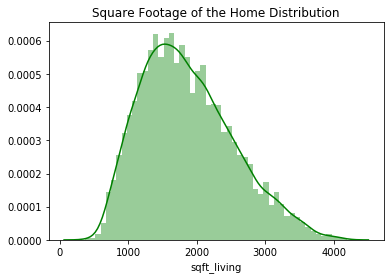

In [55]:
sns.distplot(df['sqft_living'], color='green').set_title('Square Footage of the Home Distribution')

In [257]:
p = quantile(data,'sqft_living')
c = quantile_count(p,'sqft_living')
c

,sqft_living,count
0,370-1350.0,4205
1,1350.0-1780.0,4206
2,1780.0-2300.0,4175
3,2300.0-4230,4147


We see a slight skew in this data, but distributions can tell us something about home price.

In [56]:
f = 'price~sqft_living'

model = smf.ols(formula=f, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     8627.
Date:                Thu, 05 Mar 2020   Prob (F-statistic):               0.00
Time:                        12:08:16   Log-Likelihood:            -2.2625e+05
No. Observations:               16720   AIC:                         4.525e+05
Df Residuals:                   16718   BIC:                         4.525e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.127e+05   4152.039     27.144      0.000    1.05e+05    1.21e+05
sqft_living   194.6643      2.096     92.881      0.000     190.556     198.772
==============================================================================
Omnibus:                     2063.287   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3450.116
Skew:                           0.849   Prob(JB):                         0.00
Kurtosis:                       4.437   Cond. No.                     5.84e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

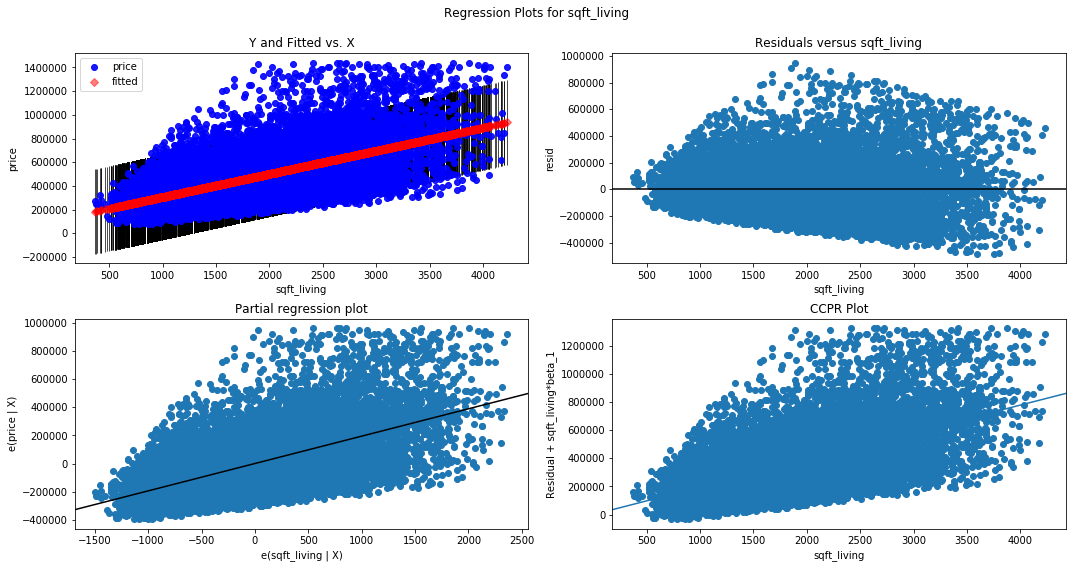

In [284]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_living", fig=fig)
plt.show()

/Users/marigaldina/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



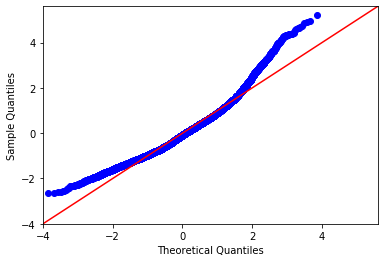

In [57]:
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

Huge condition number and correlation matrix show us strong multicollinearity for `'sqft_living'` or other numerical problems.

In [9]:
df['living_log'] = np.log(df['sqft_living'])

Text(0.5, 1.0, 'Distribution of LOG Square Feet')

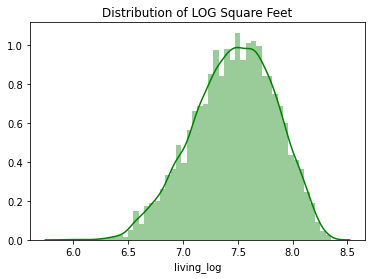

In [11]:
sns.distplot(df['living_log'], color='green').set_title('Distribution of LOG Square Feet')

In [12]:
f = 'price~living_log'

model = smf.ols(formula=f, data=df).fit()

In [13]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     7436.
Date:                Tue, 04 Aug 2020   Prob (F-statistic):               0.00
Time:                        09:54:34   Log-Likelihood:            -2.2686e+05
No. Observations:               16733   AIC:                         4.537e+05
Df Residuals:                   16731   BIC:                         4.537e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.007e+06   2.88e+04    -69.620      0.000   -2.06e+06   -1.95e+06
living_log  3.326e+05   3857.454     86.233      0.000    3.25e+05     3.4e+05
==============================================================================
Omnibus:                     2182.104   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3600.569
Skew:                           0.896   Prob(JB):                         0.00
Kurtosis:                       4.396   Cond. No.                         152.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

My R-squared went from 0.334 to 0.308 + 
living_log looks much more normal 
Kurtosis is much closer to 3 (down to 2.970 from 3.153) so I'm willing to accept a slightly lower R-squared.

## Check resuduals

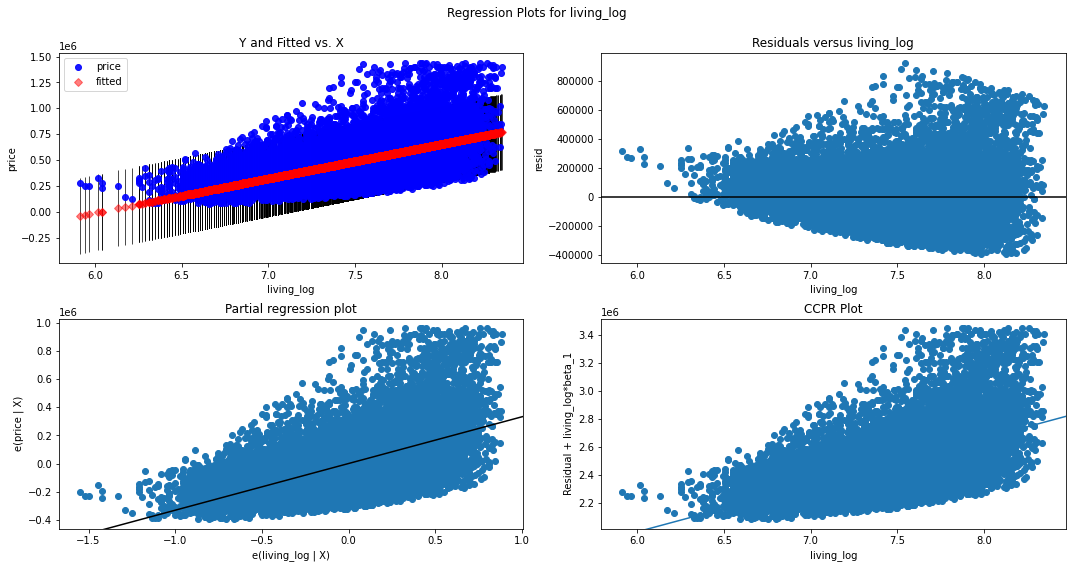

In [14]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "living_log", fig=fig)
plt.show()

/Users/marigaldina/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



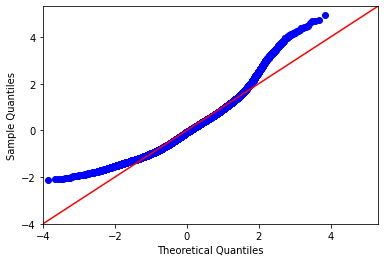

In [15]:
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

## Summary for question 3 

Both sqft_living and living_log produce fairly similar results. The log of sqft_living produces slightly less skewed data but at the expense of our R-Squared.
As far as the residuals being normally distributed, again, both models produce similar results.
I think, I will most likely try out both of these features to see which works best in the context of the whole.

# More EDA for zip code and lat/long

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]),
 <a list of 64 Text major ticklabel objects>)

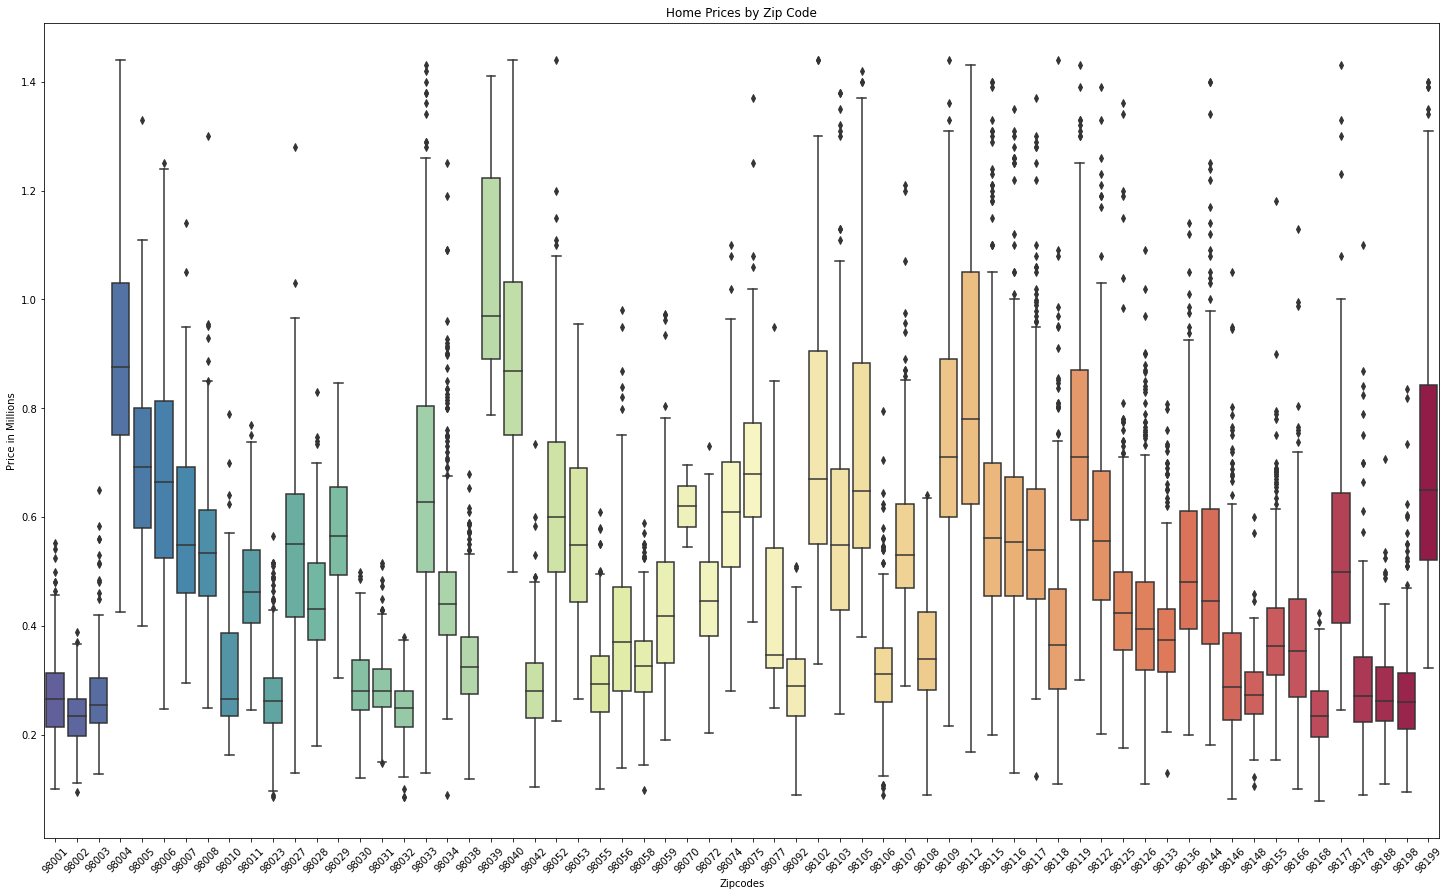

In [16]:
df['Zipcodes'] = df['zipcode']
df['Price in Millions'] = df['price']/1000000

plt.figure(figsize = (25, 15))
fig = sns.boxplot(x = 'Zipcodes', y = 'Price in Millions', data = df, palette = 'Spectral_r').set_title('Home Prices by Zip Code')
plt.xticks(rotation=45)

In [17]:
mean_by_zip = df.groupby('zipcode').mean()['price']

In [18]:
mean_by_zip

zipcode
98001    274168.213974
98002    233102.169231
98003    274365.651741
98004    913615.505952
98005    702580.317308
             ...      
98177    544657.610837
98178    300304.201613
98188    279195.674603
98198    280369.886640
98199    702824.666667
Name: price, Length: 64, dtype: float64

Text(0, 0.5, 'Price')

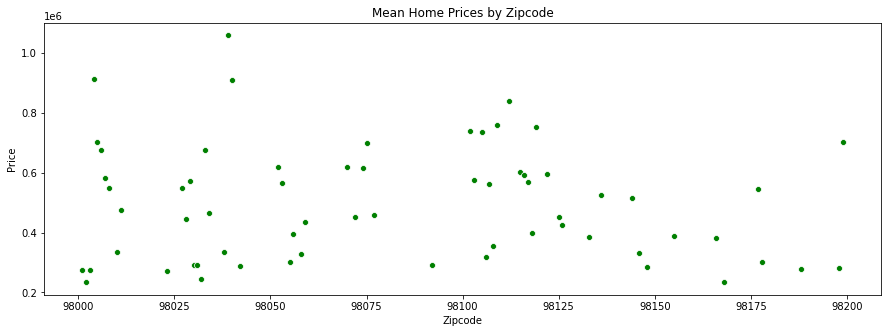

In [19]:
plt.figure(figsize = (15, 5))
ax = sns.scatterplot(data = mean_by_zip, color = 'green').set_title('Mean Home Prices by Zipcode')
plt.xlabel('Zipcode')
plt.ylabel('Price')

In [20]:
only_zips = pd.concat([df['zipcode'], df['price']])

In [21]:
only_zips.head(3)

0    98178.0
1    98125.0
2    98028.0
dtype: float64

## Can we check does the proximity to Downtown affect home prices?

In [22]:
dt_lat = 47.6062
dt_long = -122.3321

In [25]:
df = pd.read_csv('cleaned_kc_house_data.csv')
df = df.drop('Unnamed: 0', axis = 1)
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,1
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,2
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,1
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,2


In [28]:
df_ll = pd.concat([df['price'], df['lat'], df['long']], axis = 1)

In [30]:
df_ll.head()

,price,lat,long
0,221900.0,47.5112,-122.257
1,538000.0,47.7210,-122.319
2,180000.0,47.7379,-122.233
3,604000.0,47.5208,-122.393
4,510000.0,47.6168,-122.045


In [34]:
def distance(lon1, lat1, lon2 = dt_long, lat2 = dt_lat):
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

In [37]:
df_ll['dist'] = df_ll.apply(lambda x: distance(x['long'], x['lat']), axis = 1)

In [38]:
df_ll

,price,lat,long,dist
0,221900.0,47.5112,-122.257,11.972687
1,538000.0,47.7210,-122.319,12.802819
2,180000.0,47.7379,-122.233,16.416960
3,604000.0,47.5208,-122.393,10.538233
4,510000.0,47.6168,-122.045,21.553979
...,...,...,...,...
21281,360000.0,47.6993,-122.346,10.404472
21282,400000.0,47.5107,-122.362,10.853552
21283,402101.0,47.5944,-122.299,2.807293
21284,400000.0,47.5345,-122.069,21.287500


Text(0.5, 1.0, 'Home Prices by Distance from Downtown Seattle')

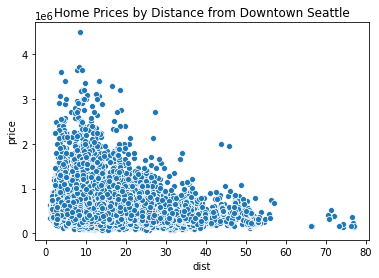

In [39]:
sns.scatterplot(x = 'dist', y = 'price', data = df_ll).set_title('Home Prices by Distance from Downtown Seattle')

Text(0.5, 1.0, 'Distance from Downtown Seattle Distribution')

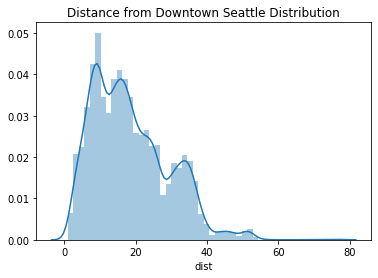

In [40]:
sns.distplot(df_ll['dist']).set_title('Distance from Downtown Seattle Distribution')

In [41]:
f = 'price~dist'

model = smf.ols(formula=f, data=df_ll).fit()

In [42]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     2195.
Date:                Tue, 04 Aug 2020   Prob (F-statistic):               0.00
Time:                        10:18:59   Log-Likelihood:            -2.9908e+05
No. Observations:               21286   AIC:                         5.982e+05
Df Residuals:                   21284   BIC:                         5.982e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.962e+05   4203.456    165.623      0.000    6.88e+05    7.04e+05
dist       -9227.6687    196.962    -46.850      0.000   -9613.729   -8841.609
==============================================================================
Omnibus:                    13378.558   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           211689.157
Skew:                           2.778   Prob(JB):                         0.00
Kurtosis:                      17.416   Cond. No.                         42.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [296]:
# Save cleaned file to use with other pages
df.to_csv('explore_kc_house_data.csv', index=False)

# Summary

In addition to the correlations between price and other features, there are some other noteworthy facts about the correlation matrix: the strongest correlation is between sqft_living and sqft_above, the srongest negative correlation is between zipcode and longitode, suggesting that zipcodes in King County were drawn from east to west. Generally, there is a strong correlation between the quantities that relate to the size of the house: sqft_living, sqft_living15, sqft_above, bedrooms, and bathrooms.

In [286]:

# Linear Regression
lr = LinearRegression()

# Evaluate model with cross-validation
cvs = cross_val_score(estimator=lr, X=X_train, 
                                    y=y_train, 
                                    cv=10, scoring='r2')
print('CV score: %.3f ± %.3f' % (cvs.mean(), cvs.std()))

CV score: 0.706 ± 0.007


In [287]:
lr.fit(X_train, y_train)
coef_list = list(lr.coef_)
name_list = list(X_train.columns)
pd.Series(coef_list, index=name_list)

bedrooms         -13020.064711
bathrooms         28276.663182
sqft_living          60.180015
sqft_lot              0.015661
floors            28708.833079
waterfront       212292.330250
view              39352.380595
condition         27874.491753
grade             84335.836287
sqft_above           30.380300
sqft_basement        29.799714
yr_built          -2098.825753
yr_renovated         17.295057
zipcode            -276.796004
lat              565175.822411
long             -69475.006891
sqft_living15        47.616641
sqft_lot15           -1.124496
date_day           -239.662378
date_month          364.376473
date_year         25336.476466
date_DoW           -146.170793
dtype: float64

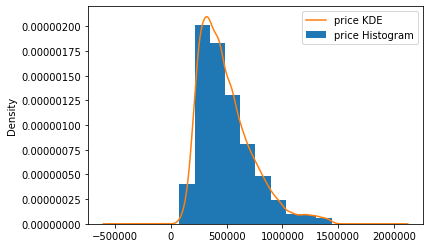

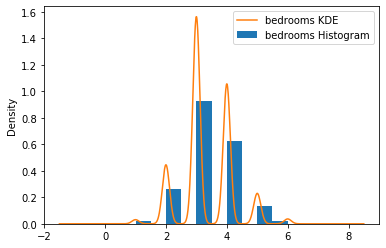

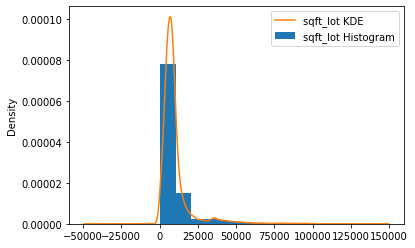

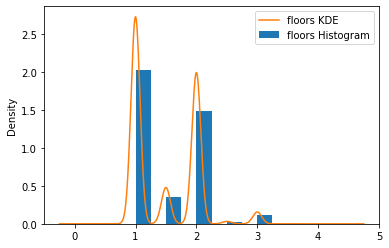

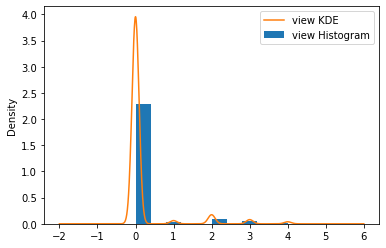

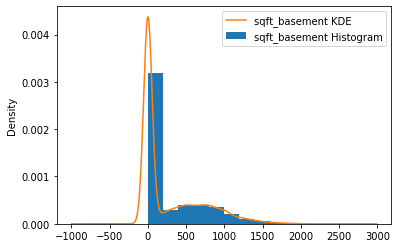

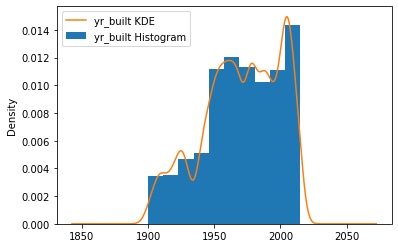

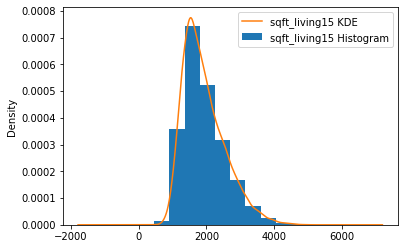

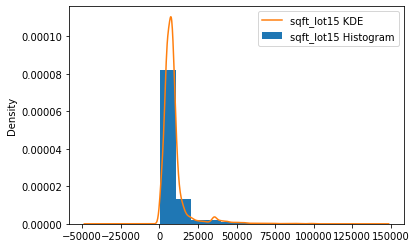

In [18]:
for column in ['price', 'bedrooms', 'sqft_lot', 'floors', 'view', 'sqft_basement', 'yr_built', 
               'sqft_living15', 'sqft_lot15']:
    df[column].plot.hist(density=True, label=column + ' Histogram')
    df[column].plot.kde(label=column + ' KDE')
    plt.legend()
    plt.show()

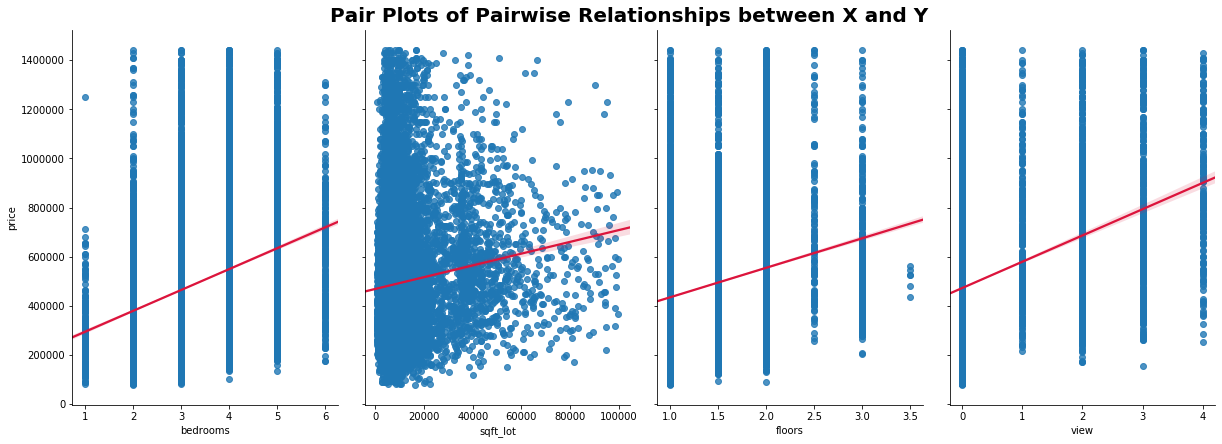

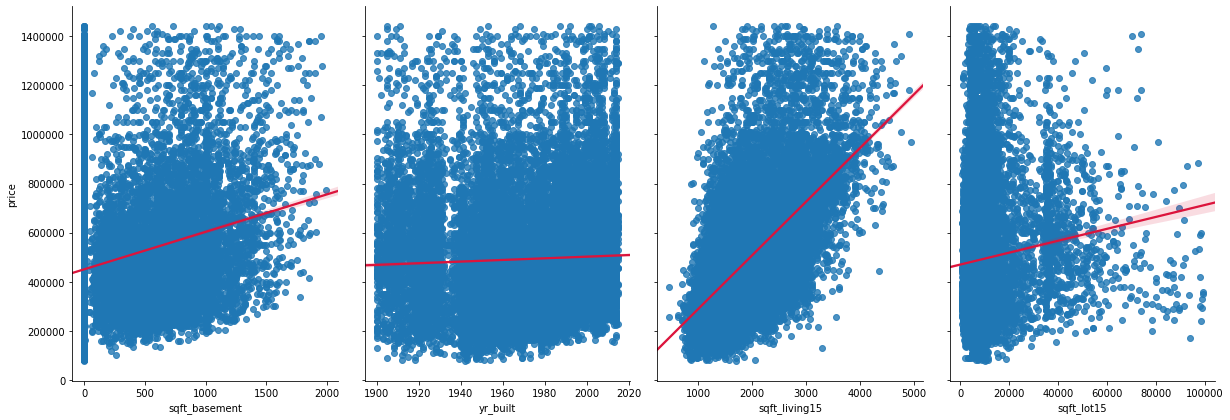

In [19]:
# visualize the pairwise relationship between the features and the response using pairplots (seaborn scatterplots)

sns.pairplot(x_vars=['bedrooms', 'sqft_lot', 'floors', 'view'], 
             y_vars='price', data=df, 
             kind='reg', plot_kws={'line_kws':{'color':'crimson'}}, height=6, aspect=0.7)

plt.suptitle('Pair Plots of Pairwise Relationships between X and Y', size=20, weight='bold', y=1.02)

sns.pairplot(x_vars=['sqft_basement', 'yr_built', 'sqft_living15', 'sqft_lot15'], 
             y_vars='price', data=df, 
             kind='reg', plot_kws={'line_kws':{'color':'crimson'}}, height=6, aspect=0.7)
plt.show();